# MTCNN and required packages

In [1]:
! pip install mtcnn
from mtcnn import MTCNN
import cv2
import imageio
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import sys
import os
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
import imageio
import glob
import numpy as np

     |████████████████████████████████| 2.3 MB 12.3 MB/s 


In [2]:
# Ref: https://www.geeksforgeeks.org/python-os-chdir-method/
# Ref: https://stackoverflow.com/questions/9234560/find-all-csv-files-in-a-directory-using-python/12280052 
#os.chdir(r"C:\Users\Gfg\Desktop\geeks")
#print("Directory changed")

# This is the path where you want to search
#path = '/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/Datasets/manipulated_sequences/Deepfakes/raw/videos'

# this is the extension you want to detect
extension = '.jpg'

def get_list_filenames(cwd, path, extension):
    try:
        os.chdir(path)
        print("Successfully change the directory!")
        filenames = glob.glob('*.{}'.format(extension))
        print("Number of files: ", len(filenames))

    # Caching the exception
    except: 
        print("Something wrong with specified directory. Exception- ", sys.exc_info()) 

    # handling with finally: restore the path which is the current directory before changing directory           
    finally: 
        print("Restoring the path") 
        os.chdir(cwd) # Change it back to cwd (original directory)
        print("Current directory is-", os.getcwd()) 
        
    return filenames


# Ref: https://realpython.com/python-keras-text-classification/

# Get a list of dataframe after reading all csv files given a path
def get_all_image_files_read(path, filenames):
    list_img = []
    for file in filenames:
        img = imageio.imread(path+file)
        list_img.append(img)
    return list_img

# Deepfake Videos Facial Extractions

In [3]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_fake
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_fake
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_fake


In [4]:
# initial directory 
cwd = os.getcwd()
path_org = './' # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)
print(filename[6999])

Successfully change the directory!
Number of files:  7000
Restoring the path
Current directory is- /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_fake
Deepfake_video0_5.jpg


In [ ]:
print(filename[3393])
print(len(filename))

Deepfake_video485_4.jpg
7000


In [ ]:
#filename = '/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_fake'

def extract_face(filename, required_size=(320, 320)):
	errCount = 0
	for i in range(len(filename)):
		# load image from file
		pixels = imageio.imread(filename[i])
		# create the detector, using default weights
		detector = MTCNN()
		# detect faces in the image
		results = detector.detect_faces(pixels)
		# make sure the captured probability > 0.9 and 4 values in box.keys()
		if results:
			if results[0]['confidence'] >= 0.9 and len(results[0]['box']) == 4:
			# extract the bounding box from the first face
				x1, y1, width, height = results[0]['box']
				x2, y2 = x1 + width, y1 + height
				# extract the face
				print("The confidence is " + str(results[0]['confidence']))
				face = pixels[y1:y2, x1:x2]
				# resize pixels to the model size
				image = Image.fromarray(face)
				image = image.resize(required_size)
				# return face_array
				face_array = np.asarray(image)
				name = './DeepFake_facial_extractions/image' + "_" + str(i) + '.jpg'
				# writing the extracted images
				imageio.imwrite(name, face_array)
				#print(str(i) + "/" + str(len(filename)) + "iterations")
				print('creating...' + name)
			else:
				errCount += 1
				print("confidence < 0.9")
				continue
		else:
			errCount += 1
			print("The face cannot be captured")
			continue
	return errCount			

In [ ]:
extract_face(filename, required_size=(320, 320))

Streaming output truncated to the last 5000 lines.
creating..../DeepFake_facial_extractions/image_4495.jpg
The confidence is 0.9999760389328003
creating..../DeepFake_facial_extractions/image_4496.jpg
The confidence is 0.9998964071273804
creating..../DeepFake_facial_extractions/image_4497.jpg
The confidence is 1.0
creating..../DeepFake_facial_extractions/image_4498.jpg
The confidence is 0.9999974966049194
creating..../DeepFake_facial_extractions/image_4499.jpg
The confidence is 0.999994158744812
creating..../DeepFake_facial_extractions/image_4500.jpg
The confidence is 0.9999980926513672
creating..../DeepFake_facial_extractions/image_4501.jpg
The confidence is 0.9999972581863403
creating..../DeepFake_facial_extractions/image_4502.jpg
The confidence is 0.9999446868896484
creating..../DeepFake_facial_extractions/image_4503.jpg
The confidence is 0.999593198299408
creating..../DeepFake_facial_extractions/image_4504.jpg
The confidence is 0.9992914199829102
creating..../DeepFake_facial_extract

16

In [ ]:
err_images = 16
print("MTCNN model cannot capture {} images in the Deepfake set".format(err_images))
capture_rate = (1 - (err_images/len(filename)))*100
print("The Capture Rate of Deepfakes is " + str(round(capture_rate, 2)) + "%")

MTCNN model cannot capture 16 images in the Deepfake set
The Capture Rate of Deepfakes is 99.77%


# Real Videos Facial Extractions

In [ ]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_real
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_real
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_real


In [ ]:
# initial directory 
cwd = os.getcwd()
path_org = './' # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)
print(filename[6999])

Successfully change the directory!
Number of files:  7000
Restoring the path
Current directory is- /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_real
real_video7_7.jpg


In [ ]:
print(filename[333])
print(len(filename))

real_video912_6.jpg
7000


In [ ]:
#filename = '/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/data_real'

def extract_face(filename, required_size=(320, 320)):
	errCount = 0
	for i in range(len(filename)):
		# load image from file
		pixels = imageio.imread(filename[i])
		# create the detector, using default weights
		detector = MTCNN()
		# detect faces in the image
		results = detector.detect_faces(pixels)
		# make sure the captured probability > 0.9 and 4 values in box.keys()
		if results:
			if results[0]['confidence'] >= 0.9 and len(results[0]['box']) == 4:
			# extract the bounding box from the first face
				x1, y1, width, height = results[0]['box']
				x2, y2 = x1 + width, y1 + height
				# extract the face
				print("The confidence is " + str(results[0]['confidence']))
				face = pixels[y1:y2, x1:x2]
				# resize pixels to the model size
				image = Image.fromarray(face)
				image = image.resize(required_size)
				# return face_array
				face_array = np.asarray(image)
				name = './Real_facial_extractions/image' + "_" + str(i) + '.jpg'
				# writing the extracted images
				imageio.imwrite(name, face_array)
				#print(str(i) + "/" + str(len(filename)) + "iterations")
				print('creating...' + name)
			else:
				errCount += 1
				print("confidence < 0.9")
				continue
		else:
			errCount += 1
			print("The face cannot be captured")
			continue
	return errCount		

In [ ]:
extract_face(filename, required_size=(320, 320))

Streaming output truncated to the last 5000 lines.
The confidence is 1.0
creating..../Real_facial_extractions/image_4500.jpg
The confidence is 0.9999898672103882
creating..../Real_facial_extractions/image_4501.jpg
The confidence is 0.9999997615814209
creating..../Real_facial_extractions/image_4502.jpg
The confidence is 0.9999862909317017
creating..../Real_facial_extractions/image_4503.jpg
The confidence is 0.9999940395355225
creating..../Real_facial_extractions/image_4504.jpg
The confidence is 0.9999951124191284
creating..../Real_facial_extractions/image_4505.jpg
The confidence is 0.9999877214431763
creating..../Real_facial_extractions/image_4506.jpg
The confidence is 0.9999613761901855
creating..../Real_facial_extractions/image_4507.jpg
The confidence is 0.9999939203262329
creating..../Real_facial_extractions/image_4508.jpg
The confidence is 0.9995566010475159
creating..../Real_facial_extractions/image_4509.jpg
The confidence is 0.9999755620956421
creating..../Real_facial_extractions/

0

In [ ]:
err_images = 0
print("MTCNN model cannot capture {} images in the Real set".format(err_images))
capture_rate = (1 - (err_images/len(filename)))*100
print("The Capture Rate of Reals is " + str(round(capture_rate, 2)) + "%")

MTCNN model cannot capture 0 images in the Real set
The Capture Rate of Reals is 100.0%


# Testing Zone

In [18]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions
!pwd
# initial directory 
cwd = os.getcwd()
path_org = './' # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)
print(filename[699])

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions
Successfully change the directory!
Number of files:  7000
Restoring the path
Current directory is- /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions
image_6699.jpg


In [25]:
import imageio
img = imageio.imread(filename[6606])
print(img.shape)

(320, 320, 3)


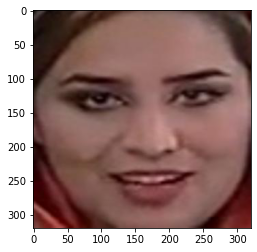

In [26]:
plt.imshow(img)

# References
- https://github.com/ipazc/mtcnn